# Simulated Annealing for Tetris Optimization

Simulated Annealing (SA) is one of the simplest and best-known meta-heuristic method for addressing the difficult black box global optimization problems (those whose objective function is not explicitly given and can only be evaluated via some costly computer simulation). It is massively used on real-life applications.

The main advantage of SA is its simplicity. SA is based on an analogy with the physical annealing of materials that avoids the drawback of the Monte-Carlo approach (which can be trapped in local minima), thanks to an efficient Metropolis acceptance criterion.


The SA algorithm is describes as follows:
- Firstly, we select an initial state s0 which will be the current solution of our problem.
- Then, for each iteration : 
    - We select a neighbour of this point following a known distribution of probability (in our case a normal distribution).
    - We compare the objective functions of both points.
    - The neighbour becomes a the current solution with the following probability of acceptance: 

\begin{cases}
    1 & \text{if } f(j) < f(i) \\
    e^{\frac{f(i)-f(j)}{c}} & \text{otherwise}
\end{cases}

j being the neighbour, i the current solution and f the objective function (-score in our case).

Here is an implementation of the SA algorithm applied to learning Tetris.






In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import os
os.chdir('C:/Users/USER/Desktop/Tetris/learning_tetris/game_code')
from game_simulation import *

In [10]:
def simulation_SA(N_iteration, step_size, temp):
    learning_curve = []
    
    s0 = np.random.multivariate_normal(np.zeros(21), 100*np.eye(21))
    best_score = simulation(s0)


    for i in range(N_iteration):
        neighbour = s0 + np.random.multivariate_normal(np.zeros(21), np.eye(21))*step_size
        score_neighbour = simulation(neighbour)
        
        delta = score_neighbour - best_score
        if delta > 0:
            s0, best_score = neighbour, score_neighbour
        else:
            t = temp / float(i+1)
            metropolis = exp(delta/t)
            if np.random.rand() < metropolis:
                s0, best_score = neighbour, score_neighbour
        
        

        
        learning_curve.append(best_score)
        print("Iteration {}: score : {}".format(i+1, learning_curve[-1]))
    
    return learning_curve


print(simulation_SA(1000, 20, 20))  


Iteration 1: Average score : 0.0
Iteration 2: Average score : 0.0
Iteration 3: Average score : 0.0
Iteration 4: Average score : 0.0
Iteration 5: Average score : 0.1
Iteration 6: Average score : 0.2
Iteration 7: Average score : 0.0
Iteration 8: Average score : 0.0
Iteration 9: Average score : 0.0
Iteration 10: Average score : 0.0
Iteration 11: Average score : 0.1
Iteration 12: Average score : 0.0
Iteration 13: Average score : 0.0
Iteration 14: Average score : 0.0
Iteration 15: Average score : 0.0
Iteration 16: Average score : 0.1


KeyboardInterrupt: 

As the algorithm became longer to converge, albeit simpler, efforts were made to enhance its performance by selecting a sample as both the current solution and the neighbor, instead of a single point. Furthermore, akin to the cross-entropy method, parameters of the distributions are updated with those of the best-performing samples in terms of score. This adaptation facilitates faster convergence.

Here is an implimentation of our enhanced simulated annealing.

In [26]:
def SA(cooling, n_iteration, n_samples, rho):

    mean = np.zeros(21)
    cov = 100 * np.eye(21)
    learning_curve = []
    T = 100 # Initial Temperature
    
    for j in range(n_iteration):
        s0 = np.random.multivariate_normal(mean, cov, n_samples)
        s_neighbour = s0 + np.random.multivariate_normal(np.zeros(21), 50*np.eye(21), n_samples)
        scores = [simulation(sample) for sample in s0]
        scores_neighbour = [simulation(sample) for sample in s_neighbour]

        best_indexes = np.argsort(scores)[-int(n_samples * rho):]
        best_samples = s0[best_indexes]
        best_scores = np.array(scores)[best_indexes]

        best_indexes = np.argsort(scores_neighbour)[-int(n_samples * rho):]
        best_neighbours = s_neighbour[best_indexes]
        best_scores_neighbour = np.array(scores_neighbour)[best_indexes]

        theta = np.mean(best_scores) - np.mean(best_scores_neighbour)
        if theta < 0:
            s0 = s_neighbour
            best_samples = best_neighbours
        else:
            p = exp(-theta/T)
            u = np.random.random()
            if u < p:
                s0 = s_neighbour
                best_samples = best_neighbours

        mean = np.mean(best_samples, axis = 0)
        cov =  np.cov(best_samples, rowvar = False, bias=True)

    

        test_scores = []
        for _ in range(30):
            test_scores.append(simulation(mean))

        learning_curve.append(np.mean(test_scores))
        print("Iteration {}: Average score : {}".format(j+1, learning_curve[-1]))


        T *= cooling
        
    return(learning_curve)


In [27]:
curve = SA(.5, 50, 100, .1)

Iteration 1: Average score : 10.1
Iteration 2: Average score : 17.733333333333334
Iteration 3: Average score : 20.4
Iteration 4: Average score : 24.666666666666668
Iteration 5: Average score : 54.2
Iteration 6: Average score : 52.53333333333333
Iteration 7: Average score : 64.03333333333333
Iteration 8: Average score : 65.96666666666667
Iteration 9: Average score : 83.46666666666667
Iteration 10: Average score : 85.43333333333334
Iteration 11: Average score : 83.6
Iteration 12: Average score : 97.16666666666667
Iteration 13: Average score : 78.03333333333333
Iteration 14: Average score : 82.3
Iteration 15: Average score : 84.43333333333334
Iteration 16: Average score : 120.7
Iteration 17: Average score : 138.9
Iteration 18: Average score : 151.66666666666666
Iteration 19: Average score : 164.63333333333333
Iteration 20: Average score : 154.1
Iteration 21: Average score : 145.9
Iteration 22: Average score : 147.46666666666667
Iteration 23: Average score : 138.5
Iteration 24: Average sco

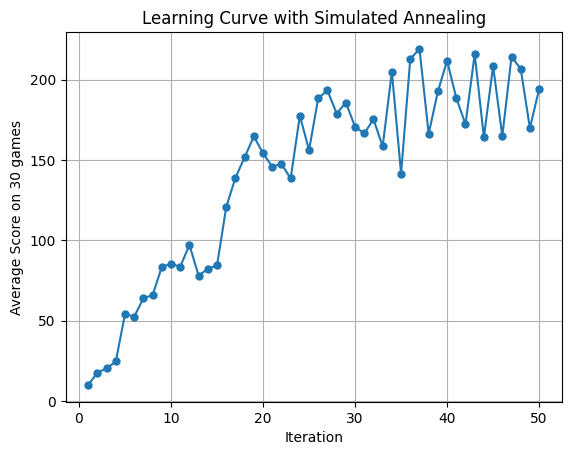

In [35]:
plt.plot(range(1,51), curve, 'o-', markersize=5)
plt.xlabel('Iteration')
plt.ylabel('Average Score on 30 games')
plt.title('Learning Curve with Simulated Annealing')
plt.grid(True)
plt.show()